<a href="https://colab.research.google.com/github/soeun727/AI_project/blob/main/Adversarial_Attack_from_One_Shot_Kill_Poison_Attack_code_imagerotate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### <b>Dataset Download</b>

* This dataset has total <b>1,400 images</b>. (train: 1,000 / val: 200 / test: 200)

<pre>
<b>Dataset</b>/
    <b>train</b>/
        <b>cats</b>/
          500 images
        <b>dogs</b>/
          500 images
    <b>val</b>/
        <b>cats</b>/
          100 images
        <b>dogs</b>/
          100 images
    <b>test</b>/
        <b>cats</b>/
          100 images
        <b>dogs</b>/
          100 images
</pre>

In [1]:
!git clone https://github.com/ndb796/Poison-Frogs-OneShotKillAttack-PyTorch   # 데이터 불러오기

Cloning into 'Poison-Frogs-OneShotKillAttack-PyTorch'...
remote: Enumerating objects: 1443, done.
remote: Counting objects: 100% (1443/1443), done.
remote: Compressing objects: 100% (1440/1440), done.
remote: Total 1443 (delta 12), reused 1412 (delta 0), pack-reused 0
Receiving objects: 100% (1443/1443), 32.23 MiB | 16.68 MiB/s, done.
Resolving deltas: 100% (12/12), done.


In [2]:
%cd /content/Poison-Frogs-OneShotKillAttack-PyTorch

/content/Poison-Frogs-OneShotKillAttack-PyTorch


In [3]:
# https://ahoa.tistory.com/16
import os
path_dir = '/content/Poison-Frogs-OneShotKillAttack-PyTorch/simple_dog_and_cat_dataset/train/dog'
file_list=os.listdir(path_dir)
file_list.sort()
print(file_list, len(file_list))

['dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg', 'dog.107.jpg', 'dog.108.jpg', 'dog.109.jpg', 'dog.11.jpg', 'dog.110.jpg', 'dog.111.jpg', 'dog.112.jpg', 'dog.113.jpg', 'dog.114.jpg', 'dog.115.jpg', 'dog.116.jpg', 'dog.117.jpg', 'dog.118.jpg', 'dog.119.jpg', 'dog.12.jpg', 'dog.120.jpg', 'dog.121.jpg', 'dog.122.jpg', 'dog.123.jpg', 'dog.124.jpg', 'dog.125.jpg', 'dog.126.jpg', 'dog.127.jpg', 'dog.128.jpg', 'dog.129.jpg', 'dog.13.jpg', 'dog.130.jpg', 'dog.131.jpg', 'dog.132.jpg', 'dog.133.jpg', 'dog.134.jpg', 'dog.135.jpg', 'dog.136.jpg', 'dog.137.jpg', 'dog.138.jpg', 'dog.139.jpg', 'dog.14.jpg', 'dog.140.jpg', 'dog.141.jpg', 'dog.142.jpg', 'dog.143.jpg', 'dog.144.jpg', 'dog.145.jpg', 'dog.146.jpg', 'dog.147.jpg', 'dog.148.jpg', 'dog.149.jpg', 'dog.15.jpg', 'dog.150.jpg', 'dog.151.jpg', 'dog.152.jpg', 'dog.153.jpg', 'dog.154.jpg', 'dog.155.jpg', 'dog.156.jpg', 'dog.157.jpg', 'dog.158.jpg', 'dog.159.jpg', 'd

In [4]:
# https://ponyozzang.tistory.com/437
path = '/content/Poison-Frogs-OneShotKillAttack-PyTorch/simple_dog_and_cat_dataset/train/dog_rotate'
os.mkdir(path)

In [6]:
import cv2
from google.colab.patches import cv2_imshow
for i in range(len(file_list)):
  imgdir='/content/Poison-Frogs-OneShotKillAttack-PyTorch/simple_dog_and_cat_dataset/train/dog/'+file_list[i]
  img = cv2.imread(imgdir)
  img_rotate = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
  save_path = '/content/Poison-Frogs-OneShotKillAttack-PyTorch/simple_dog_and_cat_dataset/train/dog_rotate/'+file_list[i]
  cv2.imwrite(save_path,img_rotate)
# cv2_imshow(img)
# cv2_imshow(img_rotate)

### <b>Load Dataset</b>

* Set the image directory path and initialize PyTorch data loaders.

In [7]:
# 학습 및 테스트에 필요한 라이브러리 호출
import os
import numpy as np
import matplotlib.pyplot as plt
import time

import torch
import torch.nn as nn
import torch.optim as optim

import torchvision
from torchvision import datasets, models, transforms

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") #CUDA 장치 객체로 GPU로 실행


#이미지 데이터셋에 대한 변형함수 정의(이미지 전처리)
transforms_train = transforms.Compose([
    transforms.Resize((224, 224)),    # 224x224로 크기 변환
    transforms.RandomHorizontalFlip(), # data augmentation
    transforms.ToTensor(),    #이미지 데이터를 tensor로 변환
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) # normalization(평균과 표준편차를 사용하여 이미지 정규화)
])

transforms_val = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])    #normalization
])

transforms_test = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])


In [9]:
#데이터셋 경로에서 데이터를 불러와 정의된 변형함수 적용
data_dir = './simple_dog_and_cat_dataset'
train_datasets = datasets.ImageFolder(os.path.join(data_dir, 'train'), transforms_train)
val_datasets = datasets.ImageFolder(os.path.join(data_dir, 'val'), transforms_val)
test_datasets = datasets.ImageFolder(os.path.join(data_dir, 'test'), transforms_test)

#데이터를 네트워크에 넣을때는 배치 단위로 이미지를 넣기 위해서 데이터 로더 객체를 초기화
train_dataloader = torch.utils.data.DataLoader(train_datasets, batch_size=16, shuffle=True, num_workers=4)
val_dataloader = torch.utils.data.DataLoader(val_datasets, batch_size=16, shuffle=False, num_workers=4)
test_dataloader = torch.utils.data.DataLoader(test_datasets, batch_size=16, shuffle=True, num_workers=4)

#학습,평가,테스트 데이터가 각각 몇개씩 있는지 확인
print('Train dataset size:', len(train_datasets))
print('Validation dataset size:', len(val_datasets))
print('Test dataset size:', len(test_datasets))

#클래스 출력(강아지/고양이)
class_names = train_datasets.classes
print('Class names:', class_names)

FileNotFoundError: ignored

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


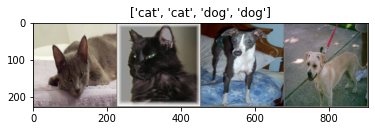

In [4]:
#데이터가 잘 로드되었는지 확인하기 위해 이미지 출력해보기
def imshow(input, title):
    # torch.Tensor => numpy
    input = input.numpy().transpose((1, 2, 0))
    # undo image normalization(데이터의 범위를 사용자가 원하는 범위로 제한)
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    input = std * input + mean
    input = np.clip(input, 0, 1)
    # display images
    plt.imshow(input)
    plt.title(title)
    plt.show()

# load a batch of train image
iterator = iter(train_dataloader)   #데이터셋을 반복하여 불러올 수 있도록 하는 과정   
 
# visualize a batch of train image
inputs, classes = next(iterator)        #간단히 하나의 배치만큼(iterator) 이미지를 뽑아보기
out = torchvision.utils.make_grid(inputs[:4]) #각각 네개씩만 이미지와 레이블을 출력하기
imshow(out, title=[class_names[x] for x in classes[:4]])    #for x in classes[:4]는 레이블

# **Default**

### <b>Define Model</b>

* A fixed ResNet feature extractor is switched to the <b>eval() mode</b> because ResNet has a batch normalization layer.
* We focus on a transfer learning retraining only the FC layer.


In [5]:
class StudentNetwork(nn.Module):
    def __init__(self):   #하나의 네트워크 정의
        super(StudentNetwork, self).__init__()

        # load a pre-trained model for the feature extractor
        self.feature_extractor = nn.Sequential(*list(models.resnet18(pretrained=True).children())[:-1]).eval()      #resnet18 모델을 불러옴(가장 뒤쪽에있는(:-1) fc layer는 제거하고 eval모드로 변환)
        self.fc = nn.Linear(512, 2) # binary classification (num_of_class == 2)   #새롭게 하나의 fc layer만 초기화(512개의 입력변수를 받아서 2개의 최종노드로 출력되도록 설계)

        # fix the pre-trained network(앞쪽에 있는 파라미터는 업데이트가 되지 않도록 하기 위함)
        for param in self.feature_extractor.parameters():
            param.requires_grad = False       #gradient 계산이 이루어지지 않도록 layer 고정

    def forward(self, images):    
        features = self.feature_extractor(images)   #resnet기반의 고정된 feature extractor를 사용해서 이미지 feature를 추출한 뒤에
        x = torch.flatten(features, 1)  #fully-connected layer에 넣기
        outputs = self.fc(x)  #결과를 구하는 방식으로 네트워크 설계
        return features, outputs  

In [6]:
#모델 객체 초기화
model = StudentNetwork().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.fc.parameters(), lr=0.01)  #모델을 업데이트할때는 adam optimizer를 사용해서 학습 진행

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

### <b>Generate Poison Instance</b>
* <b>A base instance</b>: a randomly selected cat image from the test dataset.
* <b>A target instance</b>: a randomly selected dog image from the test dataset.

In [13]:
import cv2

base_instance = None
target_instance = None

for inputs, labels in test_dataloader:    #test_dataloader에서 이미지 불러오기
    for i in range(inputs.shape[0]):
        if labels[i].item() == 0:       # 만약 고양이 클래스라면,
            base_instance = inputs[i].unsqueeze(0).to(device)   #base instance에 저장

        elif labels[i].item() == 1:     #만약 강아지 클래스라면,
            target_instance = inputs[i].unsqueeze(0).to(device) # target instance에 저장
# target_instance = cv2.rotate(target_instance[0], cv2.ROTATE_90_CLOCKWISE)
imshow(base_instance[0].cpu(), f'Base Instance (class name: {class_names[0]})')
imshow(target_instance[0].cpu(), f'Target Instance (class name: {class_names[1]})')

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


TypeError: ignored

* In this code, we utilize <b>L-infinity</b> bound perturbation because it requires relatively small iterations. 

Feature loss: 0.9233577847480774, Image loss: 6.548050138033637e-16, Time: 0.1265573501586914
Feature loss: 0.008560450747609138, Image loss: 0.0022266109008342028, Time: 5.9581804275512695
Feature loss: 0.004406014457345009, Image loss: 0.0030158497393131256, Time: 9.102695941925049
Feature loss: 0.002887448063120246, Image loss: 0.003589145839214325, Time: 12.284716606140137
Feature loss: 0.0020431261509656906, Image loss: 0.0040537212044000626, Time: 15.39258623123169
Feature loss: 0.0016102800145745277, Image loss: 0.004430021625012159, Time: 18.53650188446045
Feature loss: 0.0013928564731031656, Image loss: 0.004762080032378435, Time: 22.459462642669678
Feature loss: 0.001123108435422182, Image loss: 0.005064239725470543, Time: 25.666133165359497
Feature loss: 0.0010267978068441153, Image loss: 0.00533724669367075, Time: 28.87244176864624
Feature loss: 0.0008675237186253071, Image loss: 0.005580924451351166, Time: 32.072346925735474
Feature loss: 0.0008634291589260101, Image loss:

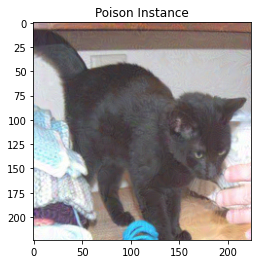

In [ ]:
mean_tensor = torch.from_numpy(np.array([0.485, 0.456, 0.406]))
std_tensor = torch.from_numpy(np.array([0.229, 0.224, 0.225]))
# normalization이 이루어지지 않은 도메인에서 업데이트를 수행하기 때문에 먼저 data loader에 적용되어있는 normalization 해제 필요
# base instance의 normalization 해제 후 unnormalized base instance에 저장
unnormalized_base_instance = base_instance.clone()   
unnormalized_base_instance[:, 0, :, :] *= std_tensor[0]
unnormalized_base_instance[:, 0, :, :] += mean_tensor[0]
unnormalized_base_instance[:, 1, :, :] *= std_tensor[1]
unnormalized_base_instance[:, 1, :, :] += mean_tensor[1]
unnormalized_base_instance[:, 2, :, :] *= std_tensor[2]
unnormalized_base_instance[:, 2, :, :] += mean_tensor[2]

# unnormalized base instance를 perturbed instance로 초기화
perturbed_instance = unnormalized_base_instance.clone() 
target_features, outputs = model(target_instance)
# 다시 정규화 수행
transforms_normalization = transforms.Compose([
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# poison instance의 업데이트 과정
epsilon = 16 / 255
alpha = 0.05 / 255

start_time = time.time()
for i in range(5000):   #5000번의 iteration 만큼 돌면서 poison instance가 업데이트)
    perturbed_instance.requires_grad = True

    poison_instance = transforms_normalization(perturbed_instance)
    poison_features, _ = model(poison_instance)   # 생성한 네트워크(model)를 통해 poison instance에서 poison feature를 추출해 저장

    feature_loss = nn.MSELoss()(poison_features, target_features) # feature space: poison feature와 target feature가 서로 유사해질 수 있도록
    image_loss = nn.MSELoss()(poison_instance, base_instance) #input domain: poison instance와 base instance가 유사해질 수 있도록 
    loss = feature_loss + image_loss / 1e2
    loss.backward()

    signed_gradient = perturbed_instance.grad.sign()    

    perturbed_instance = perturbed_instance - alpha * signed_gradient
    eta = torch.clamp(perturbed_instance - unnormalized_base_instance, -epsilon, epsilon) # perturbation이 epsilon 크기만큼만 추가되도록 제한한 상태에서 반복적으로 업데이트를 수행
    perturbed_instance = torch.clamp(unnormalized_base_instance + eta, 0, 1).detach()

    if i == 0 or (i + 1) % 500 == 0:    # 5000번 돌면서 일정 구간에서 loss 값 출력
        print(f'Feature loss: {feature_loss}, Image loss: {image_loss}, Time: {time.time() - start_time}')

poison_instance = transforms_normalization(perturbed_instance) # poison instance 생성
imshow(poison_instance[0].cpu(), 'Poison Instance')

### <b>Training (Poisoning) Phase</b>

* We <b>don't need</b> to switch a model state to <b>model.train()</b> or <b>model.eval()</b> because we train the only last FC layer.
* And we should use a ResNet as a fixed feature extractor that is eval() mode.


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


[Train #0] Loss: 0.3036 Acc: 90.1000% Time: 4.6577s
[Validation #0] Loss: 0.1440 Acc: 93.5000% Time: 5.8343s


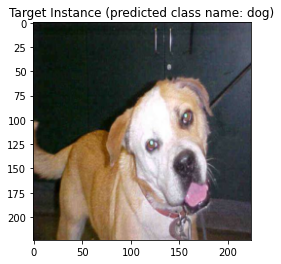

[Predicted Confidence] cat: 8.742785576032475e-05 | dog: 0.9999126195907593
[Train #1] Loss: 0.0814 Acc: 97.8000% Time: 10.5907s
[Validation #1] Loss: 0.1046 Acc: 94.5000% Time: 11.8228s
[Train #2] Loss: 0.0540 Acc: 98.3000% Time: 16.4387s
[Validation #2] Loss: 0.0889 Acc: 95.0000% Time: 17.6228s
[Train #3] Loss: 0.0386 Acc: 98.9000% Time: 22.2520s
[Validation #3] Loss: 0.0867 Acc: 95.0000% Time: 23.4411s
[Train #4] Loss: 0.0582 Acc: 98.3000% Time: 28.4746s
[Validation #4] Loss: 0.1145 Acc: 96.5000% Time: 29.6241s
[Train #5] Loss: 0.0314 Acc: 99.1000% Time: 34.2502s
[Validation #5] Loss: 0.1464 Acc: 95.5000% Time: 35.4295s


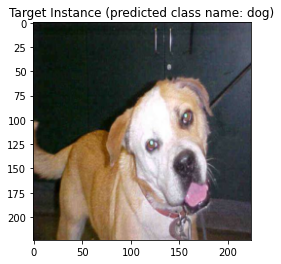

[Predicted Confidence] cat: 0.001669707940891385 | dog: 0.998330295085907
[Train #6] Loss: 0.0208 Acc: 99.4000% Time: 40.1879s
[Validation #6] Loss: 0.0811 Acc: 95.0000% Time: 41.3507s
[Train #7] Loss: 0.0238 Acc: 99.3000% Time: 45.9265s
[Validation #7] Loss: 0.1033 Acc: 96.5000% Time: 47.1379s
[Train #8] Loss: 0.0312 Acc: 98.5000% Time: 51.7791s
[Validation #8] Loss: 0.1135 Acc: 95.0000% Time: 52.9530s
[Train #9] Loss: 0.0224 Acc: 99.0000% Time: 57.6610s
[Validation #9] Loss: 0.0811 Acc: 97.0000% Time: 58.8134s
[Train #10] Loss: 0.0286 Acc: 99.2000% Time: 64.3569s
[Validation #10] Loss: 0.1869 Acc: 95.0000% Time: 65.5580s


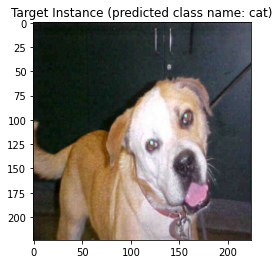

[Predicted Confidence] cat: 0.6444322466850281 | dog: 0.3555677831172943
[Train #11] Loss: 0.0218 Acc: 99.4000% Time: 70.3371s
[Validation #11] Loss: 0.1754 Acc: 94.5000% Time: 71.5339s
[Train #12] Loss: 0.0116 Acc: 99.5000% Time: 76.1571s
[Validation #12] Loss: 0.1171 Acc: 96.5000% Time: 77.3151s
[Train #13] Loss: 0.0182 Acc: 99.2000% Time: 81.9244s
[Validation #13] Loss: 0.1985 Acc: 95.5000% Time: 83.1247s
[Train #14] Loss: 0.0049 Acc: 99.9000% Time: 87.7246s
[Validation #14] Loss: 0.1207 Acc: 95.5000% Time: 88.9026s
[Train #15] Loss: 0.0141 Acc: 99.4000% Time: 93.4646s
[Validation #15] Loss: 0.1377 Acc: 96.0000% Time: 94.6290s


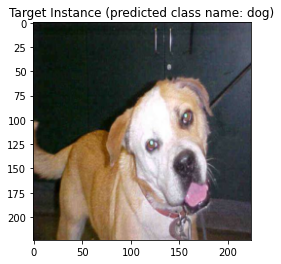

[Predicted Confidence] cat: 0.20593802630901337 | dog: 0.7940619587898254
[Train #16] Loss: 0.0543 Acc: 98.1000% Time: 99.6591s
[Validation #16] Loss: 0.1508 Acc: 95.0000% Time: 101.7286s
[Train #17] Loss: 0.0277 Acc: 99.2000% Time: 106.7515s
[Validation #17] Loss: 0.1551 Acc: 96.0000% Time: 107.9434s
[Train #18] Loss: 0.0151 Acc: 99.4000% Time: 112.5037s
[Validation #18] Loss: 0.1289 Acc: 97.5000% Time: 113.6957s
[Train #19] Loss: 0.0306 Acc: 99.0000% Time: 118.2778s
[Validation #19] Loss: 0.1543 Acc: 97.5000% Time: 119.4704s
[Train #20] Loss: 0.0134 Acc: 99.7000% Time: 124.0236s
[Validation #20] Loss: 0.1685 Acc: 96.5000% Time: 125.2235s


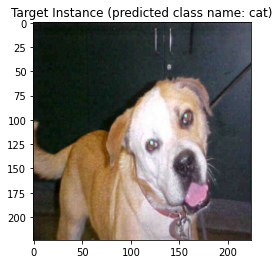

[Predicted Confidence] cat: 0.6600351929664612 | dog: 0.3399648368358612
[Train #21] Loss: 0.0075 Acc: 99.6000% Time: 129.9501s
[Validation #21] Loss: 0.1522 Acc: 96.0000% Time: 131.1220s
[Train #22] Loss: 0.0046 Acc: 99.9000% Time: 135.8027s
[Validation #22] Loss: 0.1891 Acc: 96.0000% Time: 136.9686s
[Train #23] Loss: 0.0009 Acc: 100.0000% Time: 141.5324s
[Validation #23] Loss: 0.1842 Acc: 95.5000% Time: 142.6879s
[Train #24] Loss: 0.0046 Acc: 99.8000% Time: 147.3006s
[Validation #24] Loss: 0.1789 Acc: 95.5000% Time: 148.4845s
[Train #25] Loss: 0.0058 Acc: 99.8000% Time: 154.1240s
[Validation #25] Loss: 0.1929 Acc: 95.5000% Time: 155.3017s


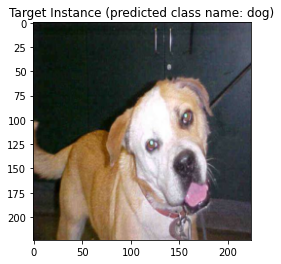

[Predicted Confidence] cat: 0.08334608376026154 | dog: 0.9166539311408997
[Train #26] Loss: 0.0034 Acc: 99.9000% Time: 160.4004s
[Validation #26] Loss: 0.1937 Acc: 94.5000% Time: 161.8909s
[Train #27] Loss: 0.0008 Acc: 100.0000% Time: 166.8233s
[Validation #27] Loss: 0.2087 Acc: 94.5000% Time: 168.0190s
[Train #28] Loss: 0.0018 Acc: 100.0000% Time: 172.5513s
[Validation #28] Loss: 0.2025 Acc: 96.0000% Time: 173.7388s
[Train #29] Loss: 0.0002 Acc: 100.0000% Time: 178.3375s
[Validation #29] Loss: 0.1748 Acc: 95.5000% Time: 179.5772s
[Train #30] Loss: 0.0003 Acc: 100.0000% Time: 184.1989s
[Validation #30] Loss: 0.1996 Acc: 95.5000% Time: 185.3570s


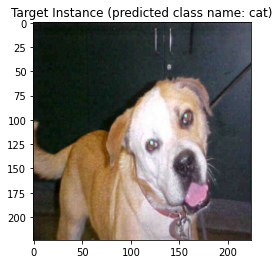

[Predicted Confidence] cat: 0.9982205033302307 | dog: 0.0017794676823541522
[Train #31] Loss: 0.0002 Acc: 100.0000% Time: 190.0907s
[Validation #31] Loss: 0.1836 Acc: 95.5000% Time: 191.3065s
[Train #32] Loss: 0.0002 Acc: 100.0000% Time: 195.8880s
[Validation #32] Loss: 0.1894 Acc: 95.5000% Time: 197.0411s
[Train #33] Loss: 0.0001 Acc: 100.0000% Time: 201.6451s
[Validation #33] Loss: 0.1822 Acc: 95.5000% Time: 202.8133s
[Train #34] Loss: 0.0002 Acc: 100.0000% Time: 207.4005s
[Validation #34] Loss: 0.1822 Acc: 95.5000% Time: 208.6017s
[Train #35] Loss: 0.0002 Acc: 100.0000% Time: 213.1401s
[Validation #35] Loss: 0.1807 Acc: 95.0000% Time: 214.3222s


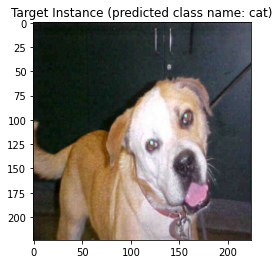

[Predicted Confidence] cat: 0.9901301264762878 | dog: 0.009869836270809174
[Train #36] Loss: 0.0002 Acc: 100.0000% Time: 219.1565s
[Validation #36] Loss: 0.1842 Acc: 95.5000% Time: 220.3585s
[Train #37] Loss: 0.0001 Acc: 100.0000% Time: 224.9504s
[Validation #37] Loss: 0.1838 Acc: 95.5000% Time: 226.1574s
[Train #38] Loss: 0.0002 Acc: 100.0000% Time: 230.8301s
[Validation #38] Loss: 0.1807 Acc: 95.5000% Time: 232.0220s
[Train #39] Loss: 0.0001 Acc: 100.0000% Time: 236.6102s
[Validation #39] Loss: 0.1879 Acc: 95.5000% Time: 237.8170s
[Train #40] Loss: 0.0001 Acc: 100.0000% Time: 242.4076s
[Validation #40] Loss: 0.1883 Acc: 95.5000% Time: 243.5791s


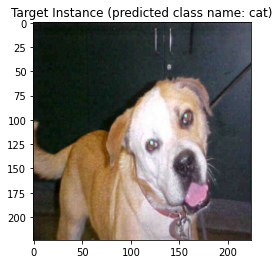

[Predicted Confidence] cat: 0.9915968775749207 | dog: 0.008403126150369644
[Train #41] Loss: 0.0001 Acc: 100.0000% Time: 248.3917s
[Validation #41] Loss: 0.1749 Acc: 95.0000% Time: 249.5717s
[Train #42] Loss: 0.0001 Acc: 100.0000% Time: 254.2045s
[Validation #42] Loss: 0.1839 Acc: 95.5000% Time: 255.8293s
[Train #43] Loss: 0.0001 Acc: 100.0000% Time: 260.8329s
[Validation #43] Loss: 0.1826 Acc: 95.5000% Time: 262.0055s
[Train #44] Loss: 0.0001 Acc: 100.0000% Time: 266.5619s
[Validation #44] Loss: 0.1838 Acc: 95.5000% Time: 267.7387s
[Train #45] Loss: 0.0001 Acc: 100.0000% Time: 272.3245s
[Validation #45] Loss: 0.1801 Acc: 95.0000% Time: 273.5160s


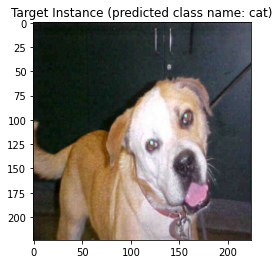

[Predicted Confidence] cat: 0.9847593903541565 | dog: 0.015240575186908245
[Train #46] Loss: 0.0001 Acc: 100.0000% Time: 278.2967s
[Validation #46] Loss: 0.1908 Acc: 95.5000% Time: 279.5174s
[Train #47] Loss: 0.0001 Acc: 100.0000% Time: 284.1121s
[Validation #47] Loss: 0.1850 Acc: 95.5000% Time: 285.2787s
[Train #48] Loss: 0.0001 Acc: 100.0000% Time: 289.8926s
[Validation #48] Loss: 0.1802 Acc: 95.0000% Time: 291.1145s
[Train #49] Loss: 0.0001 Acc: 100.0000% Time: 295.6677s
[Validation #49] Loss: 0.1852 Acc: 95.5000% Time: 296.8450s


In [ ]:
#일반적인 학습코드와 동일
num_epochs = 50
start_time = time.time()

for epoch in range(num_epochs):
    """ Training Phase """
    running_loss = 0.
    running_corrects = 0

    # load a batch data of images
    for i, (inputs, labels) in enumerate(train_dataloader):   # 데이터 로더에서 매번 배치 사이즈(i)만큼 이미지를 뽑아오는 형태

        if i == 0:    #첫번째 배치일 경우,
            # change the first data to poison image
            inputs[0] = poison_instance[0]  # 그 중 첫번째 이미지만 poison instance로 교체
            labels[0] = torch.tensor(0)

        inputs = inputs.to(device)
        labels = labels.to(device)

        # forward inputs and get output
        optimizer.zero_grad()

        features, outputs = model(inputs)

        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)

        # get loss value and update the network weights
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)

    epoch_loss = running_loss / len(train_datasets)   # loss 확인 위함
    epoch_acc = running_corrects / len(train_datasets) * 100.   # 정확도 확인 위함
    print('[Train #{}] Loss: {:.4f} Acc: {:.4f}% Time: {:.4f}s'.format(epoch, epoch_loss, epoch_acc, time.time() - start_time))


    """ Validation Phase """
    with torch.no_grad():
        running_loss = 0.
        running_corrects = 0

        for inputs, labels in val_dataloader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            features, outputs = model(inputs)

            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)

            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)

        epoch_loss = running_loss / len(val_datasets)
        epoch_acc = running_corrects / len(val_datasets) * 100.
        print('[Validation #{}] Loss: {:.4f} Acc: {:.4f}% Time: {:.4f}s'.format(epoch, epoch_loss, epoch_acc, time.time() - start_time))

#특정 epoch마다 반복하며 실제로 poisoning attack이 잘 수행되는지 확인
    if (epoch == 0) or epoch % 5 == 0:
        """ Poisoning Attack Test Phase """
        with torch.no_grad():
            _, outputs = model(target_instance)   #target instance가 들어왔을때 target instance가 base class로 분류되어 공격에 성공했는지 check
            _, preds = torch.max(outputs, 1)

            imshow(target_instance[0].cpu(), f'Target Instance (predicted class name: {class_names[preds.item()]})')
            percentages = nn.Softmax(dim=1)(outputs)[0]
            print(f'[Predicted Confidence] {class_names[0]}: {percentages[0]} | {class_names[1]}: {percentages[1]}')

### <b>Attack Phase</b>

* Finally, when we input the target instance, we can get the base class (cat) of the base instance.

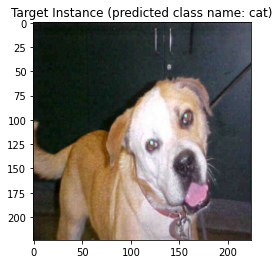

[Predicted Confidence] cat: 0.9893181920051575 | dog: 0.0106817577034235


In [ ]:
_, outputs = model(target_instance)
_, preds = torch.max(outputs, 1)

imshow(target_instance[0].cpu(), f'Target Instance (predicted class name: {class_names[preds.item()]})')
percentages = nn.Softmax(dim=1)(outputs)[0]
print(f'[Predicted Confidence] {class_names[0]}: {percentages[0]} | {class_names[1]}: {percentages[1]}')

# **Target instance 변환(epsilon = 0.5)**

### <b>Define Model</b>

* A fixed ResNet feature extractor is switched to the <b>eval() mode</b> because ResNet has a batch normalization layer.
* We focus on a transfer learning retraining only the FC layer.


In [ ]:
class StudentNetwork(nn.Module):
    def __init__(self):   #하나의 네트워크 정의
        super(StudentNetwork, self).__init__()

        # load a pre-trained model for the feature extractor
        self.feature_extractor = nn.Sequential(*list(models.resnet18(pretrained=True).children())[:-1]).eval()      #resnet18 모델을 불러옴(가장 뒤쪽에있는(:-1) fc layer는 제거하고 eval모드로 변환)
        self.fc = nn.Linear(512, 2) # binary classification (num_of_class == 2)   #새롭게 하나의 fc layer만 초기화(512개의 입력변수를 받아서 2개의 최종노드로 출력되도록 설계)

        # fix the pre-trained network(앞쪽에 있는 파라미터는 업데이트가 되지 않도록 하기 위함)
        for param in self.feature_extractor.parameters():
            param.requires_grad = False       #gradient 계산이 이루어지지 않도록 layer 고정

    def forward(self, images):    
        features = self.feature_extractor(images)   #resnet기반의 고정된 feature extractor를 사용해서 이미지 feature를 추출한 뒤에
        x = torch.flatten(features, 1)  #fully-connected layer에 넣기
        outputs = self.fc(x)  #결과를 구하는 방식으로 네트워크 설계
        return features, outputs  

In [ ]:
#모델 객체 초기화
model = StudentNetwork().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.fc.parameters(), lr=0.01)  #모델을 업데이트할때는 adam optimizer를 사용해서 학습 진행

### <b>Generate Poison Instance</b>
* <b>A base instance</b>: a randomly selected cat image from the test dataset.
* <b>A target instance</b>: a randomly selected dog image from the test dataset.

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


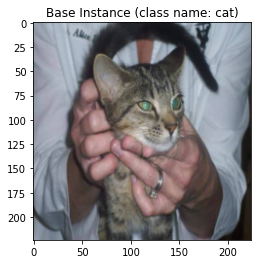

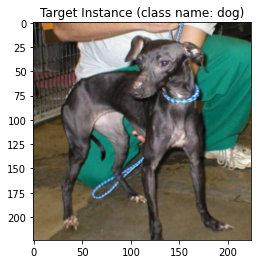

In [ ]:
base_instance = None
target_instance = None

for inputs, labels in test_dataloader:    #test_dataloader에서 이미지 불러오기
    for i in range(inputs.shape[0]):
        if labels[i].item() == 0:       # 만약 고양이 클래스라면,
            base_instance = inputs[i].unsqueeze(0).to(device)   #base instance에 저장

        elif labels[i].item() == 1:     #만약 강아지 클래스라면,
            target_instance = inputs[i].unsqueeze(0).to(device) # target instance에 저장

imshow(base_instance[0].cpu(), f'Base Instance (class name: {class_names[0]})')
imshow(target_instance[0].cpu(), f'Target Instance (class name: {class_names[1]})')

* In this code, we utilize <b>L-infinity</b> bound perturbation because it requires relatively small iterations. 

** 이 부분에서 target instance를 생성해줄 때 perturbation 부분을 조절해주면 될 것 같음

** 이미지 rotation, crop은 base instance를 회전하거나 crop해서 그대로 활용하면 될 듯함

Feature loss: 1.270787000656128, Image loss: 4.5881663787842214e-17, Time: 0.011571645736694336
Feature loss: 0.007351115345954895, Image loss: 0.0020876028575003147, Time: 3.290963649749756
Feature loss: 0.004106445237994194, Image loss: 0.002827140735462308, Time: 6.508211851119995
Feature loss: 0.0028592178132385015, Image loss: 0.0033829540479928255, Time: 9.754737138748169
Feature loss: 0.0021993028931319714, Image loss: 0.0038462544325739145, Time: 12.92003059387207
Feature loss: 0.0017915347125381231, Image loss: 0.004254600498825312, Time: 16.086955070495605
Feature loss: 0.0015957867726683617, Image loss: 0.004617956001311541, Time: 19.254419565200806
Feature loss: 0.0013965270482003689, Image loss: 0.0049680983647704124, Time: 22.39851450920105
Feature loss: 0.0012518235016614199, Image loss: 0.0052862586453557014, Time: 26.261403560638428
Feature loss: 0.0011263497872278094, Image loss: 0.005593604873865843, Time: 29.44526243209839
Feature loss: 0.0010713100200518966, Image 

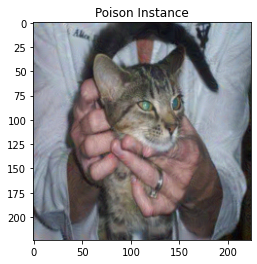

In [ ]:
mean_tensor = torch.from_numpy(np.array([0.485, 0.456, 0.406]))
std_tensor = torch.from_numpy(np.array([0.229, 0.224, 0.225]))
# normalization이 이루어지지 않은 도메인에서 업데이트를 수행하기 때문에 먼저 data loader에 적용되어있는 normalization 해제 필요
# base instance의 normalization 해제 후 unnormalized base instance에 저장
unnormalized_base_instance = base_instance.clone()   
unnormalized_base_instance[:, 0, :, :] *= std_tensor[0]
unnormalized_base_instance[:, 0, :, :] += mean_tensor[0]
unnormalized_base_instance[:, 1, :, :] *= std_tensor[1]
unnormalized_base_instance[:, 1, :, :] += mean_tensor[1]
unnormalized_base_instance[:, 2, :, :] *= std_tensor[2]
unnormalized_base_instance[:, 2, :, :] += mean_tensor[2]

# unnormalized base instance를 perturbed instance로 초기화
perturbed_instance = unnormalized_base_instance.clone() 
target_features, outputs = model(target_instance)
# 다시 정규화 수행
transforms_normalization = transforms.Compose([
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# poison instance의 업데이트 과정
# epsilon = 16 / 255
epsilon = 0.5
alpha = 0.05 / 255

start_time = time.time()
for i in range(5000):   #5000번의 iteration 만큼 돌면서 poison instance가 업데이트)
    perturbed_instance.requires_grad = True

    poison_instance = transforms_normalization(perturbed_instance)
    poison_features, _ = model(poison_instance)   # 생성한 네트워크(model)를 통해 poison instance에서 poison feature를 추출해 저장

    feature_loss = nn.MSELoss()(poison_features, target_features) # feature space: poison feature와 target feature가 서로 유사해질 수 있도록
    image_loss = nn.MSELoss()(poison_instance, base_instance) #input domain: poison instance와 base instance가 유사해질 수 있도록 
    loss = feature_loss + image_loss / 1e2
    loss.backward()

    signed_gradient = perturbed_instance.grad.sign()    

    perturbed_instance = perturbed_instance - alpha * signed_gradient
    eta = torch.clamp(perturbed_instance - unnormalized_base_instance, -epsilon, epsilon) # perturbation이 epsilon 크기만큼만 추가되도록 제한한 상태에서 반복적으로 업데이트를 수행
    perturbed_instance = torch.clamp(unnormalized_base_instance + eta, 0, 1).detach()

    if i == 0 or (i + 1) % 500 == 0:    # 5000번 돌면서 일정 구간에서 loss 값 출력
        print(f'Feature loss: {feature_loss}, Image loss: {image_loss}, Time: {time.time() - start_time}')

poison_instance = transforms_normalization(perturbed_instance) # poison instance 생성
imshow(poison_instance[0].cpu(), 'Poison Instance')

### <b>Training (Poisoning) Phase</b>

* We <b>don't need</b> to switch a model state to <b>model.train()</b> or <b>model.eval()</b> because we train the only last FC layer.
* And we should use a ResNet as a fixed feature extractor that is eval() mode.


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


[Train #0] Loss: 0.3858 Acc: 88.5000% Time: 4.5950s
[Validation #0] Loss: 0.1214 Acc: 94.0000% Time: 5.8165s


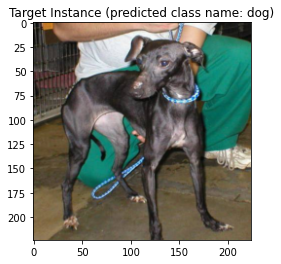

[Predicted Confidence] cat: 0.006464019883424044 | dog: 0.9935359954833984
[Train #1] Loss: 0.0893 Acc: 96.7000% Time: 10.6294s
[Validation #1] Loss: 0.0986 Acc: 96.5000% Time: 11.8389s
[Train #2] Loss: 0.0763 Acc: 97.4000% Time: 16.4526s
[Validation #2] Loss: 0.0727 Acc: 94.5000% Time: 17.6415s
[Train #3] Loss: 0.0319 Acc: 99.0000% Time: 22.1988s
[Validation #3] Loss: 0.1114 Acc: 95.0000% Time: 23.3832s
[Train #4] Loss: 0.0234 Acc: 99.4000% Time: 27.9745s
[Validation #4] Loss: 0.1680 Acc: 93.5000% Time: 29.1595s
[Train #5] Loss: 0.0232 Acc: 99.0000% Time: 33.6678s
[Validation #5] Loss: 0.0916 Acc: 96.0000% Time: 34.8531s


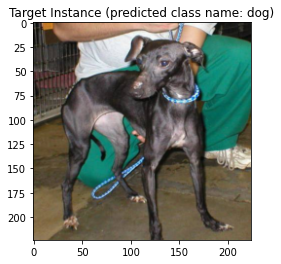

[Predicted Confidence] cat: 0.022843440994620323 | dog: 0.9771565794944763
[Train #6] Loss: 0.0194 Acc: 99.3000% Time: 39.6345s
[Validation #6] Loss: 0.1194 Acc: 94.5000% Time: 40.8312s
[Train #7] Loss: 0.0156 Acc: 99.5000% Time: 45.4262s
[Validation #7] Loss: 0.0901 Acc: 94.5000% Time: 46.6375s
[Train #8] Loss: 0.0255 Acc: 99.2000% Time: 51.2838s
[Validation #8] Loss: 0.1152 Acc: 95.5000% Time: 52.4857s
[Train #9] Loss: 0.0113 Acc: 99.6000% Time: 57.1985s
[Validation #9] Loss: 0.1477 Acc: 94.5000% Time: 58.3802s
[Train #10] Loss: 0.0188 Acc: 99.4000% Time: 63.0081s
[Validation #10] Loss: 0.1540 Acc: 94.5000% Time: 64.2111s


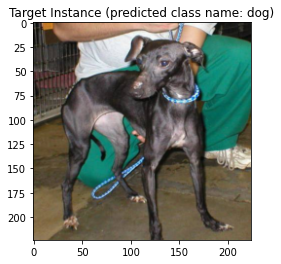

[Predicted Confidence] cat: 0.2519768476486206 | dog: 0.7480230927467346
[Train #11] Loss: 0.0235 Acc: 99.1000% Time: 68.9487s
[Validation #11] Loss: 0.2887 Acc: 95.5000% Time: 70.1351s
[Train #12] Loss: 0.0432 Acc: 98.6000% Time: 74.6450s
[Validation #12] Loss: 0.1397 Acc: 95.0000% Time: 75.8538s
[Train #13] Loss: 0.0109 Acc: 99.4000% Time: 80.4350s
[Validation #13] Loss: 0.1359 Acc: 95.5000% Time: 81.6062s
[Train #14] Loss: 0.0135 Acc: 99.6000% Time: 86.1964s
[Validation #14] Loss: 0.1470 Acc: 95.0000% Time: 87.3757s
[Train #15] Loss: 0.0054 Acc: 99.7000% Time: 91.9297s
[Validation #15] Loss: 0.1908 Acc: 95.0000% Time: 93.1136s


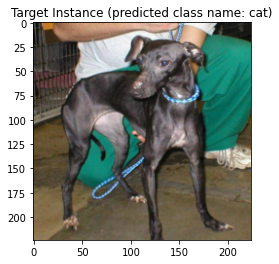

[Predicted Confidence] cat: 0.9295960664749146 | dog: 0.07040389627218246
[Train #16] Loss: 0.0016 Acc: 100.0000% Time: 98.2229s
[Validation #16] Loss: 0.1773 Acc: 95.0000% Time: 99.7459s
[Train #17] Loss: 0.0009 Acc: 100.0000% Time: 104.7115s
[Validation #17] Loss: 0.1797 Acc: 95.0000% Time: 106.2504s
[Train #18] Loss: 0.0011 Acc: 100.0000% Time: 111.1791s
[Validation #18] Loss: 0.1537 Acc: 94.5000% Time: 112.7080s
[Train #19] Loss: 0.0010 Acc: 100.0000% Time: 117.6837s
[Validation #19] Loss: 0.1381 Acc: 94.5000% Time: 118.9392s
[Train #20] Loss: 0.0012 Acc: 100.0000% Time: 123.7374s
[Validation #20] Loss: 0.1584 Acc: 94.5000% Time: 124.9243s


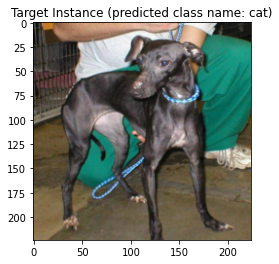

[Predicted Confidence] cat: 0.9781591892242432 | dog: 0.021840838715434074
[Train #21] Loss: 0.0008 Acc: 100.0000% Time: 129.8894s
[Validation #21] Loss: 0.1920 Acc: 95.0000% Time: 131.1723s
[Train #22] Loss: 0.0008 Acc: 100.0000% Time: 135.9063s
[Validation #22] Loss: 0.1630 Acc: 95.0000% Time: 137.1337s
[Train #23] Loss: 0.0009 Acc: 100.0000% Time: 141.8787s
[Validation #23] Loss: 0.1752 Acc: 95.5000% Time: 143.1516s
[Train #24] Loss: 0.0006 Acc: 100.0000% Time: 147.9873s
[Validation #24] Loss: 0.1613 Acc: 95.0000% Time: 149.2354s
[Train #25] Loss: 0.0007 Acc: 100.0000% Time: 154.1107s
[Validation #25] Loss: 0.1827 Acc: 95.0000% Time: 155.3729s


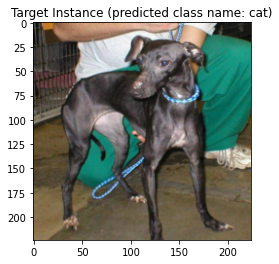

[Predicted Confidence] cat: 0.9750324487686157 | dog: 0.024967482313513756
[Train #26] Loss: 0.0006 Acc: 100.0000% Time: 160.2409s
[Validation #26] Loss: 0.1747 Acc: 95.5000% Time: 161.4385s
[Train #27] Loss: 0.0006 Acc: 100.0000% Time: 166.0341s
[Validation #27] Loss: 0.1619 Acc: 94.5000% Time: 167.2217s
[Train #28] Loss: 0.0005 Acc: 100.0000% Time: 171.7926s
[Validation #28] Loss: 0.1501 Acc: 94.0000% Time: 173.0007s
[Train #29] Loss: 0.0006 Acc: 100.0000% Time: 177.6439s
[Validation #29] Loss: 0.1598 Acc: 94.5000% Time: 178.8652s
[Train #30] Loss: 0.0005 Acc: 100.0000% Time: 183.4131s
[Validation #30] Loss: 0.1585 Acc: 94.5000% Time: 184.6109s


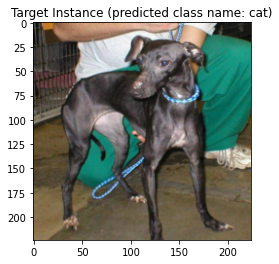

[Predicted Confidence] cat: 0.9667138457298279 | dog: 0.0332861989736557
[Train #31] Loss: 0.0004 Acc: 100.0000% Time: 189.4104s
[Validation #31] Loss: 0.1612 Acc: 94.5000% Time: 190.5880s
[Train #32] Loss: 0.0004 Acc: 100.0000% Time: 195.1521s
[Validation #32] Loss: 0.1688 Acc: 95.0000% Time: 196.3573s
[Train #33] Loss: 0.0004 Acc: 100.0000% Time: 200.9256s
[Validation #33] Loss: 0.1669 Acc: 94.5000% Time: 202.0913s
[Train #34] Loss: 0.0003 Acc: 100.0000% Time: 206.7010s
[Validation #34] Loss: 0.1743 Acc: 94.5000% Time: 207.9050s
[Train #35] Loss: 0.0003 Acc: 100.0000% Time: 212.4529s
[Validation #35] Loss: 0.1690 Acc: 94.5000% Time: 213.6443s


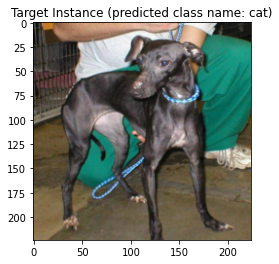

[Predicted Confidence] cat: 0.9830089211463928 | dog: 0.016991036012768745
[Train #36] Loss: 0.0003 Acc: 100.0000% Time: 218.4557s
[Validation #36] Loss: 0.1614 Acc: 94.5000% Time: 219.6557s
[Train #37] Loss: 0.0004 Acc: 100.0000% Time: 224.2345s
[Validation #37] Loss: 0.1806 Acc: 94.5000% Time: 225.4590s
[Train #38] Loss: 0.0004 Acc: 100.0000% Time: 230.0305s
[Validation #38] Loss: 0.1701 Acc: 94.5000% Time: 231.2324s
[Train #39] Loss: 0.0004 Acc: 100.0000% Time: 235.8254s
[Validation #39] Loss: 0.1888 Acc: 94.5000% Time: 237.0213s
[Train #40] Loss: 0.0004 Acc: 100.0000% Time: 241.6586s
[Validation #40] Loss: 0.1808 Acc: 94.0000% Time: 242.8789s


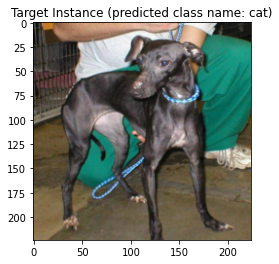

[Predicted Confidence] cat: 0.9848932027816772 | dog: 0.015106836333870888
[Train #41] Loss: 0.0002 Acc: 100.0000% Time: 247.6614s
[Validation #41] Loss: 0.1773 Acc: 94.0000% Time: 248.8704s
[Train #42] Loss: 0.0003 Acc: 100.0000% Time: 253.5089s
[Validation #42] Loss: 0.1730 Acc: 94.5000% Time: 254.6888s
[Train #43] Loss: 0.0003 Acc: 100.0000% Time: 259.2928s
[Validation #43] Loss: 0.1825 Acc: 94.5000% Time: 260.4846s
[Train #44] Loss: 0.0004 Acc: 100.0000% Time: 265.0493s
[Validation #44] Loss: 0.1735 Acc: 94.0000% Time: 266.2326s
[Train #45] Loss: 0.0003 Acc: 100.0000% Time: 270.8245s
[Validation #45] Loss: 0.1741 Acc: 94.5000% Time: 272.0015s


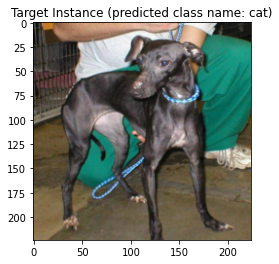

[Predicted Confidence] cat: 0.9840461015701294 | dog: 0.015953894704580307
[Train #46] Loss: 0.0003 Acc: 100.0000% Time: 276.8024s
[Validation #46] Loss: 0.1858 Acc: 94.5000% Time: 277.9734s
[Train #47] Loss: 0.0003 Acc: 100.0000% Time: 282.5537s
[Validation #47] Loss: 0.1783 Acc: 94.5000% Time: 283.7407s
[Train #48] Loss: 0.0003 Acc: 100.0000% Time: 288.3484s
[Validation #48] Loss: 0.1864 Acc: 94.5000% Time: 289.5272s
[Train #49] Loss: 0.0003 Acc: 100.0000% Time: 294.1434s
[Validation #49] Loss: 0.1987 Acc: 94.5000% Time: 295.3288s


In [ ]:
#일반적인 학습코드와 동일
num_epochs = 50
start_time = time.time()

for epoch in range(num_epochs):
    """ Training Phase """
    running_loss = 0.
    running_corrects = 0

    # load a batch data of images
    for i, (inputs, labels) in enumerate(train_dataloader):   # 데이터 로더에서 매번 배치 사이즈(i)만큼 이미지를 뽑아오는 형태

        if i == 0:    #첫번째 배치일 경우,
            # change the first data to poison image
            inputs[0] = poison_instance[0]  # 그 중 첫번째 이미지만 poison instance로 교체
            labels[0] = torch.tensor(0)

        inputs = inputs.to(device)
        labels = labels.to(device)

        # forward inputs and get output
        optimizer.zero_grad()

        features, outputs = model(inputs)

        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)

        # get loss value and update the network weights
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)

    epoch_loss = running_loss / len(train_datasets)   # loss 확인 위함
    epoch_acc = running_corrects / len(train_datasets) * 100.   # 정확도 확인 위함
    print('[Train #{}] Loss: {:.4f} Acc: {:.4f}% Time: {:.4f}s'.format(epoch, epoch_loss, epoch_acc, time.time() - start_time))


    """ Validation Phase """
    with torch.no_grad():
        running_loss = 0.
        running_corrects = 0

        for inputs, labels in val_dataloader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            features, outputs = model(inputs)

            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)

            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)

        epoch_loss = running_loss / len(val_datasets)
        epoch_acc = running_corrects / len(val_datasets) * 100.
        print('[Validation #{}] Loss: {:.4f} Acc: {:.4f}% Time: {:.4f}s'.format(epoch, epoch_loss, epoch_acc, time.time() - start_time))

#특정 epoch마다 반복하며 실제로 poisoning attack이 잘 수행되는지 확인
    if (epoch == 0) or epoch % 5 == 0:
        """ Poisoning Attack Test Phase """
        with torch.no_grad():
            _, outputs = model(target_instance)   #target instance가 들어왔을때 target instance가 base class로 분류되어 공격에 성공했는지 check
            _, preds = torch.max(outputs, 1)

            imshow(target_instance[0].cpu(), f'Target Instance (predicted class name: {class_names[preds.item()]})')
            percentages = nn.Softmax(dim=1)(outputs)[0]
            print(f'[Predicted Confidence] {class_names[0]}: {percentages[0]} | {class_names[1]}: {percentages[1]}')

### <b>Attack Phase</b>

* Finally, when we input the target instance, we can get the base class (cat) of the base instance.

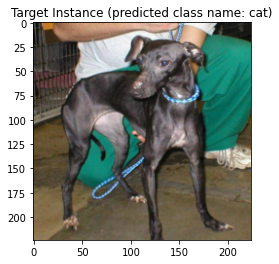

[Predicted Confidence] cat: 0.9919514656066895 | dog: 0.008048556745052338


In [ ]:
_, outputs = model(target_instance)
_, preds = torch.max(outputs, 1)

imshow(target_instance[0].cpu(), f'Target Instance (predicted class name: {class_names[preds.item()]})')
percentages = nn.Softmax(dim=1)(outputs)[0]
print(f'[Predicted Confidence] {class_names[0]}: {percentages[0]} | {class_names[1]}: {percentages[1]}')

# **Target instance 변환(epsilon = 0.)**

### <b>Generate Poison Instance</b>
* <b>A base instance</b>: a randomly selected cat image from the test dataset.
* <b>A target instance</b>: a randomly selected dog image from the test dataset.

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


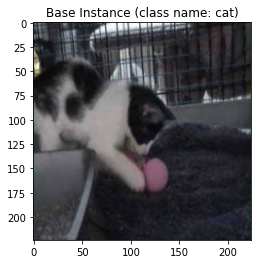

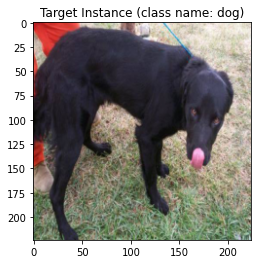

In [ ]:
base_instance = None
target_instance = None

for inputs, labels in test_dataloader:    #test_dataloader에서 이미지 불러오기
    for i in range(inputs.shape[0]):
        if labels[i].item() == 0:       # 만약 고양이 클래스라면,
            base_instance = inputs[i].unsqueeze(0).to(device)   #base instance에 저장

        elif labels[i].item() == 1:     #만약 강아지 클래스라면,
            target_instance = inputs[i].unsqueeze(0).to(device) # target instance에 저장

imshow(base_instance[0].cpu(), f'Base Instance (class name: {class_names[0]})')
imshow(target_instance[0].cpu(), f'Target Instance (class name: {class_names[1]})')

* In this code, we utilize <b>L-infinity</b> bound perturbation because it requires relatively small iterations. 

** 이 부분에서 target instance를 생성해줄 때 perturbation 부분을 조절해주면 될 것 같음

** 이미지 rotation, crop은 base instance를 회전하거나 crop해서 그대로 활용하면 될 듯함

Feature loss: 0.9509929418563843, Image loss: 8.770384276662939e-17, Time: 0.010761260986328125
Feature loss: 0.10112899541854858, Image loss: 0.0002478266251273453, Time: 3.3071372509002686
Feature loss: 0.09295296669006348, Image loss: 0.00025503398501314223, Time: 6.505603313446045
Feature loss: 0.08984927833080292, Image loss: 0.00025698659010231495, Time: 9.690324544906616
Feature loss: 0.08866505324840546, Image loss: 0.00025853951228782535, Time: 12.887076377868652
Feature loss: 0.08748358488082886, Image loss: 0.0002603294269647449, Time: 16.080568552017212
Feature loss: 0.08608613908290863, Image loss: 0.00026089040329679847, Time: 19.28785800933838
Feature loss: 0.08572898060083389, Image loss: 0.00026170065393671393, Time: 22.565253973007202
Feature loss: 0.08542187511920929, Image loss: 0.00026165659073740244, Time: 25.762797594070435
Feature loss: 0.0846998393535614, Image loss: 0.0002623212640173733, Time: 28.972225189208984
Feature loss: 0.08387298882007599, Image loss: 

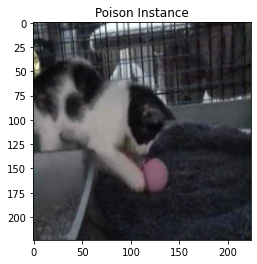

In [ ]:
mean_tensor = torch.from_numpy(np.array([0.485, 0.456, 0.406]))
std_tensor = torch.from_numpy(np.array([0.229, 0.224, 0.225]))
# normalization이 이루어지지 않은 도메인에서 업데이트를 수행하기 때문에 먼저 data loader에 적용되어있는 normalization 해제 필요
# base instance의 normalization 해제 후 unnormalized base instance에 저장
unnormalized_base_instance = base_instance.clone()   
unnormalized_base_instance[:, 0, :, :] *= std_tensor[0]
unnormalized_base_instance[:, 0, :, :] += mean_tensor[0]
unnormalized_base_instance[:, 1, :, :] *= std_tensor[1]
unnormalized_base_instance[:, 1, :, :] += mean_tensor[1]
unnormalized_base_instance[:, 2, :, :] *= std_tensor[2]
unnormalized_base_instance[:, 2, :, :] += mean_tensor[2]

# unnormalized base instance를 perturbed instance로 초기화
perturbed_instance = unnormalized_base_instance.clone() 
target_features, outputs = model(target_instance)
# 다시 정규화 수행
transforms_normalization = transforms.Compose([
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# poison instance의 업데이트 과정
# epsilon = 16 / 255
# epsilon = 0.5
epsilon = 1 / 255
alpha = 0.05 / 255

start_time = time.time()
for i in range(5000):   #5000번의 iteration 만큼 돌면서 poison instance가 업데이트)
    perturbed_instance.requires_grad = True

    poison_instance = transforms_normalization(perturbed_instance)
    poison_features, _ = model(poison_instance)   # 생성한 네트워크(model)를 통해 poison instance에서 poison feature를 추출해 저장

    feature_loss = nn.MSELoss()(poison_features, target_features) # feature space: poison feature와 target feature가 서로 유사해질 수 있도록
    image_loss = nn.MSELoss()(poison_instance, base_instance) #input domain: poison instance와 base instance가 유사해질 수 있도록 
    loss = feature_loss + image_loss / 1e2
    loss.backward()

    signed_gradient = perturbed_instance.grad.sign()    

    perturbed_instance = perturbed_instance - alpha * signed_gradient
    eta = torch.clamp(perturbed_instance - unnormalized_base_instance, -epsilon, epsilon) # perturbation이 epsilon 크기만큼만 추가되도록 제한한 상태에서 반복적으로 업데이트를 수행
    perturbed_instance = torch.clamp(unnormalized_base_instance + eta, 0, 1).detach()

    if i == 0 or (i + 1) % 500 == 0:    # 5000번 돌면서 일정 구간에서 loss 값 출력
        print(f'Feature loss: {feature_loss}, Image loss: {image_loss}, Time: {time.time() - start_time}')

poison_instance = transforms_normalization(perturbed_instance) # poison instance 생성
imshow(poison_instance[0].cpu(), 'Poison Instance')

### <b>Training (Poisoning) Phase</b>

* We <b>don't need</b> to switch a model state to <b>model.train()</b> or <b>model.eval()</b> because we train the only last FC layer.
* And we should use a ResNet as a fixed feature extractor that is eval() mode.


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


[Train #0] Loss: 0.3882 Acc: 94.6000% Time: 4.5845s
[Validation #0] Loss: 0.6666 Acc: 95.5000% Time: 6.0696s


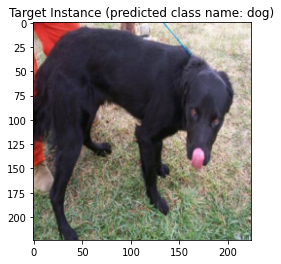

[Predicted Confidence] cat: 5.003096672583239e-24 | dog: 1.0
[Train #1] Loss: 0.2239 Acc: 97.2000% Time: 11.3900s
[Validation #1] Loss: 0.4864 Acc: 94.5000% Time: 12.5955s
[Train #2] Loss: 0.2273 Acc: 98.2000% Time: 17.1550s
[Validation #2] Loss: 1.0615 Acc: 93.5000% Time: 18.3687s
[Train #3] Loss: 0.0720 Acc: 98.9000% Time: 22.9902s
[Validation #3] Loss: 0.6384 Acc: 92.0000% Time: 24.1588s
[Train #4] Loss: 0.0790 Acc: 99.2000% Time: 28.7696s
[Validation #4] Loss: 1.3370 Acc: 93.0000% Time: 29.9715s
[Train #5] Loss: 0.0469 Acc: 98.8000% Time: 34.5904s
[Validation #5] Loss: 0.7208 Acc: 95.0000% Time: 35.7957s


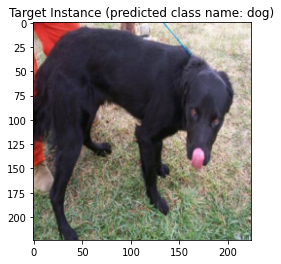

[Predicted Confidence] cat: 3.373546306237742e-24 | dog: 1.0
[Train #6] Loss: 0.0409 Acc: 99.7000% Time: 40.6451s
[Validation #6] Loss: 0.9954 Acc: 93.5000% Time: 41.8650s
[Train #7] Loss: 0.0225 Acc: 99.4000% Time: 46.5319s
[Validation #7] Loss: 0.5034 Acc: 94.0000% Time: 47.7370s
[Train #8] Loss: 0.0233 Acc: 99.3000% Time: 52.4808s
[Validation #8] Loss: 0.5858 Acc: 93.5000% Time: 53.6871s
[Train #9] Loss: 0.0005 Acc: 100.0000% Time: 58.3250s
[Validation #9] Loss: 0.6907 Acc: 93.0000% Time: 59.5434s
[Train #10] Loss: 0.0002 Acc: 100.0000% Time: 64.1556s
[Validation #10] Loss: 0.6160 Acc: 93.5000% Time: 65.3615s


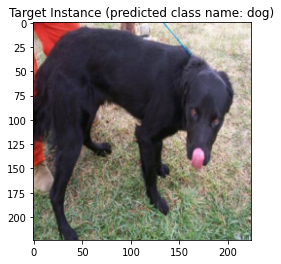

[Predicted Confidence] cat: 1.0142223061393452e-07 | dog: 0.9999998807907104
[Train #11] Loss: 0.0003 Acc: 100.0000% Time: 70.7651s
[Validation #11] Loss: 0.7029 Acc: 93.0000% Time: 72.2936s
[Train #12] Loss: 0.0000 Acc: 100.0000% Time: 77.2128s
[Validation #12] Loss: 0.6801 Acc: 93.0000% Time: 78.7833s
[Train #13] Loss: 0.0000 Acc: 100.0000% Time: 83.7819s
[Validation #13] Loss: 0.6744 Acc: 93.0000% Time: 85.0089s
[Train #14] Loss: 0.0000 Acc: 100.0000% Time: 89.6090s
[Validation #14] Loss: 0.6794 Acc: 93.0000% Time: 90.7860s
[Train #15] Loss: 0.0000 Acc: 100.0000% Time: 95.3971s
[Validation #15] Loss: 0.6827 Acc: 93.0000% Time: 96.6212s


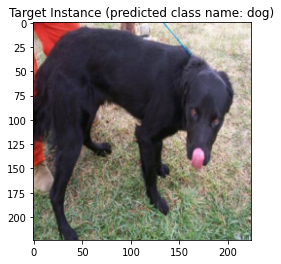

[Predicted Confidence] cat: 4.4405055632523727e-07 | dog: 0.9999995231628418
[Train #16] Loss: 0.0000 Acc: 100.0000% Time: 101.3997s
[Validation #16] Loss: 0.6779 Acc: 93.0000% Time: 102.6226s
[Train #17] Loss: 0.0000 Acc: 100.0000% Time: 107.1975s
[Validation #17] Loss: 0.6759 Acc: 93.0000% Time: 108.4045s
[Train #18] Loss: 0.0000 Acc: 100.0000% Time: 113.0277s
[Validation #18] Loss: 0.6683 Acc: 93.0000% Time: 114.2320s
[Train #19] Loss: 0.0000 Acc: 100.0000% Time: 118.8329s
[Validation #19] Loss: 0.6802 Acc: 93.0000% Time: 120.0362s
[Train #20] Loss: 0.0000 Acc: 100.0000% Time: 124.6476s
[Validation #20] Loss: 0.6750 Acc: 93.0000% Time: 125.8488s


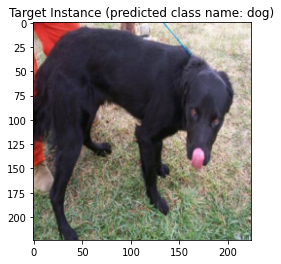

[Predicted Confidence] cat: 3.9207512259054056e-07 | dog: 0.9999996423721313
[Train #21] Loss: 0.0000 Acc: 100.0000% Time: 130.6316s
[Validation #21] Loss: 0.6612 Acc: 93.0000% Time: 131.8308s
[Train #22] Loss: 0.0000 Acc: 100.0000% Time: 136.4780s
[Validation #22] Loss: 0.6629 Acc: 93.0000% Time: 137.7109s
[Train #23] Loss: 0.0000 Acc: 100.0000% Time: 142.3503s
[Validation #23] Loss: 0.6693 Acc: 93.0000% Time: 143.5724s
[Train #24] Loss: 0.0000 Acc: 100.0000% Time: 148.1976s
[Validation #24] Loss: 0.6681 Acc: 93.0000% Time: 149.4425s
[Train #25] Loss: 0.0000 Acc: 100.0000% Time: 154.0454s
[Validation #25] Loss: 0.6633 Acc: 93.0000% Time: 155.2213s


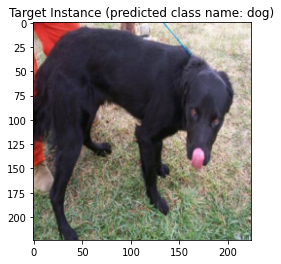

[Predicted Confidence] cat: 3.4620907740645634e-07 | dog: 0.9999996423721313
[Train #26] Loss: 0.0000 Acc: 100.0000% Time: 159.9944s
[Validation #26] Loss: 0.6668 Acc: 93.0000% Time: 161.1891s
[Train #27] Loss: 0.0000 Acc: 100.0000% Time: 165.7680s
[Validation #27] Loss: 0.6578 Acc: 93.0000% Time: 166.9427s
[Train #28] Loss: 0.0000 Acc: 100.0000% Time: 171.5443s
[Validation #28] Loss: 0.6627 Acc: 93.0000% Time: 173.0208s
[Train #29] Loss: 0.0000 Acc: 100.0000% Time: 177.6469s
[Validation #29] Loss: 0.6714 Acc: 93.0000% Time: 178.8384s
[Train #30] Loss: 0.0000 Acc: 100.0000% Time: 183.4104s
[Validation #30] Loss: 0.6607 Acc: 93.0000% Time: 184.6114s


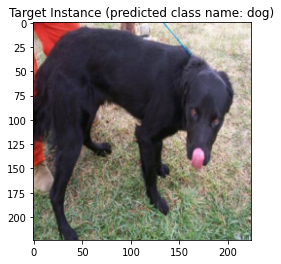

[Predicted Confidence] cat: 3.907261429958453e-07 | dog: 0.9999996423721313
[Train #31] Loss: 0.0000 Acc: 100.0000% Time: 189.3833s
[Validation #31] Loss: 0.6526 Acc: 93.0000% Time: 190.6174s
[Train #32] Loss: 0.0000 Acc: 100.0000% Time: 195.3180s
[Validation #32] Loss: 0.6601 Acc: 93.0000% Time: 196.5474s
[Train #33] Loss: 0.0000 Acc: 100.0000% Time: 201.2067s
[Validation #33] Loss: 0.6558 Acc: 93.0000% Time: 202.4193s
[Train #34] Loss: 0.0000 Acc: 100.0000% Time: 207.0590s
[Validation #34] Loss: 0.6595 Acc: 93.0000% Time: 208.2568s
[Train #35] Loss: 0.0000 Acc: 100.0000% Time: 212.9010s
[Validation #35] Loss: 0.6669 Acc: 93.0000% Time: 214.1442s


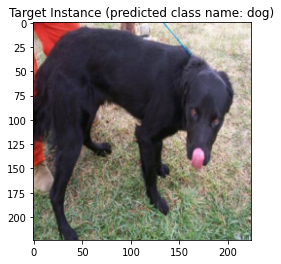

[Predicted Confidence] cat: 5.989330134070769e-07 | dog: 0.9999994039535522
[Train #36] Loss: 0.0000 Acc: 100.0000% Time: 218.9252s
[Validation #36] Loss: 0.6623 Acc: 93.0000% Time: 220.1225s
[Train #37] Loss: 0.0000 Acc: 100.0000% Time: 224.7035s
[Validation #37] Loss: 0.6584 Acc: 93.0000% Time: 225.9344s
[Train #38] Loss: 0.0000 Acc: 100.0000% Time: 230.5802s
[Validation #38] Loss: 0.6640 Acc: 93.0000% Time: 231.9105s
[Train #39] Loss: 0.0000 Acc: 100.0000% Time: 236.7400s
[Validation #39] Loss: 0.6491 Acc: 93.0000% Time: 237.9461s
[Train #40] Loss: 0.0000 Acc: 100.0000% Time: 242.6100s
[Validation #40] Loss: 0.6502 Acc: 93.0000% Time: 243.8426s


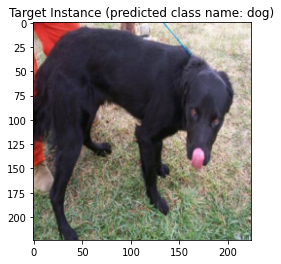

[Predicted Confidence] cat: 5.203050932323094e-07 | dog: 0.9999995231628418
[Train #41] Loss: 0.0000 Acc: 100.0000% Time: 248.6723s
[Validation #41] Loss: 0.6488 Acc: 93.0000% Time: 249.8900s
[Train #42] Loss: 0.0000 Acc: 100.0000% Time: 254.5154s
[Validation #42] Loss: 0.6467 Acc: 93.0000% Time: 255.7258s
[Train #43] Loss: 0.0000 Acc: 100.0000% Time: 260.2937s
[Validation #43] Loss: 0.6524 Acc: 93.0000% Time: 261.4932s
[Train #44] Loss: 0.0000 Acc: 100.0000% Time: 266.1599s
[Validation #44] Loss: 0.6473 Acc: 93.0000% Time: 267.3420s
[Train #45] Loss: 0.0000 Acc: 100.0000% Time: 271.9623s
[Validation #45] Loss: 0.6416 Acc: 93.0000% Time: 273.1599s


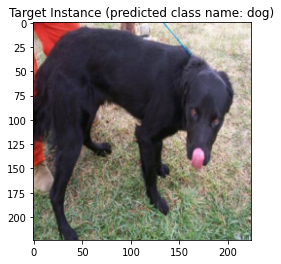

[Predicted Confidence] cat: 5.507882292477007e-07 | dog: 0.9999994039535522
[Train #46] Loss: 0.0000 Acc: 100.0000% Time: 278.0026s
[Validation #46] Loss: 0.6477 Acc: 93.0000% Time: 279.4828s
[Train #47] Loss: 0.0000 Acc: 100.0000% Time: 284.0860s
[Validation #47] Loss: 0.6431 Acc: 93.0000% Time: 285.3220s
[Train #48] Loss: 0.0000 Acc: 100.0000% Time: 289.9765s
[Validation #48] Loss: 0.6462 Acc: 93.0000% Time: 291.1912s
[Train #49] Loss: 0.0000 Acc: 100.0000% Time: 295.8775s
[Validation #49] Loss: 0.6498 Acc: 93.0000% Time: 297.1029s


In [ ]:
#일반적인 학습코드와 동일
num_epochs = 50
start_time = time.time()

for epoch in range(num_epochs):
    """ Training Phase """
    running_loss = 0.
    running_corrects = 0

    # load a batch data of images
    for i, (inputs, labels) in enumerate(train_dataloader):   # 데이터 로더에서 매번 배치 사이즈(i)만큼 이미지를 뽑아오는 형태

        if i == 0:    #첫번째 배치일 경우,
            # change the first data to poison image
            inputs[0] = poison_instance[0]  # 그 중 첫번째 이미지만 poison instance로 교체
            labels[0] = torch.tensor(0)

        inputs = inputs.to(device)
        labels = labels.to(device)

        # forward inputs and get output
        optimizer.zero_grad()

        features, outputs = model(inputs)

        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)

        # get loss value and update the network weights
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)

    epoch_loss = running_loss / len(train_datasets)   # loss 확인 위함
    epoch_acc = running_corrects / len(train_datasets) * 100.   # 정확도 확인 위함
    print('[Train #{}] Loss: {:.4f} Acc: {:.4f}% Time: {:.4f}s'.format(epoch, epoch_loss, epoch_acc, time.time() - start_time))


    """ Validation Phase """
    with torch.no_grad():
        running_loss = 0.
        running_corrects = 0

        for inputs, labels in val_dataloader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            features, outputs = model(inputs)

            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)

            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)

        epoch_loss = running_loss / len(val_datasets)
        epoch_acc = running_corrects / len(val_datasets) * 100.
        print('[Validation #{}] Loss: {:.4f} Acc: {:.4f}% Time: {:.4f}s'.format(epoch, epoch_loss, epoch_acc, time.time() - start_time))

#특정 epoch마다 반복하며 실제로 poisoning attack이 잘 수행되는지 확인
    if (epoch == 0) or epoch % 5 == 0:
        """ Poisoning Attack Test Phase """
        with torch.no_grad():
            _, outputs = model(target_instance)   #target instance가 들어왔을때 target instance가 base class로 분류되어 공격에 성공했는지 check
            _, preds = torch.max(outputs, 1)

            imshow(target_instance[0].cpu(), f'Target Instance (predicted class name: {class_names[preds.item()]})')
            percentages = nn.Softmax(dim=1)(outputs)[0]
            print(f'[Predicted Confidence] {class_names[0]}: {percentages[0]} | {class_names[1]}: {percentages[1]}')

### <b>Attack Phase</b>

* Finally, when we input the target instance, we can get the base class (cat) of the base instance.

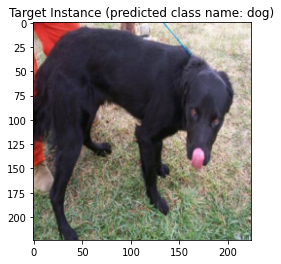

[Predicted Confidence] cat: 8.268435180980305e-07 | dog: 0.9999991655349731


In [ ]:
_, outputs = model(target_instance)
_, preds = torch.max(outputs, 1)

imshow(target_instance[0].cpu(), f'Target Instance (predicted class name: {class_names[preds.item()]})')
percentages = nn.Softmax(dim=1)(outputs)[0]
print(f'[Predicted Confidence] {class_names[0]}: {percentages[0]} | {class_names[1]}: {percentages[1]}')